In [5]:
import pretty_midi
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

# Notebook to test your MIDI generations

First, change the following paths to the MIDI you would like to check

In [2]:
path_to_input = 'path_to_input/input.mid'
path_to_output = 'path_to_output/output.mid'

## Krumhansl Ratings 

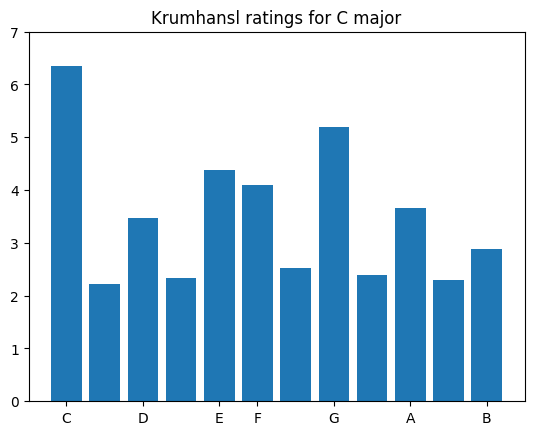

In [11]:
ratings_major = [6.35, 2.23, 3.48, 2.33, 4.38, 4.09, 2.52, 5.19, 2.39, 3.66, 2.29, 2.88]
plt.bar(range(12), ratings_major)
plt.xticks([0, 2, 4, 5, 7, 9, 11])
plt.gca().set_xticklabels(["C", "D", "E", "F", "G", "A", "B"])
plt.ylim(0, 7)
plt.title("Krumhansl ratings for C major")
plt.show()

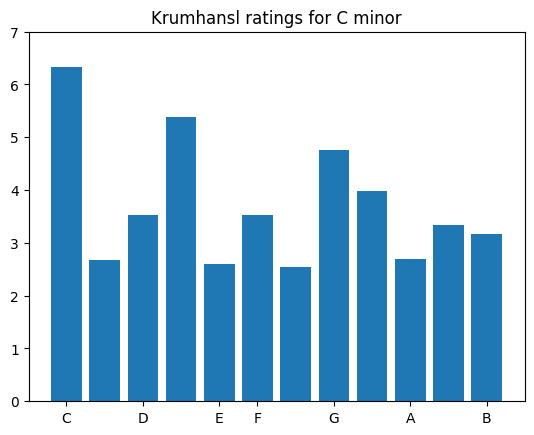

In [12]:
ratings_minor = [6.33, 2.68, 3.52, 5.38, 2.60, 3.53, 2.54, 4.75, 3.98, 2.69, 3.34, 3.17]
plt.bar(range(12), ratings_minor)
plt.xticks([0, 2, 4, 5, 7, 9, 11])
plt.gca().set_xticklabels(["C", "D", "E", "F", "G", "A", "B"])
plt.ylim(0, 7)
plt.title("Krumhansl ratings for C minor")
plt.show()

## Functions used

In [13]:
def r(X,Y):
    n = len(X)
    xmoy, ymoy = sum(X)/n, sum(Y)/n
    sum1 = sum([(X[i]-xmoy)*(Y[i]-ymoy) for i in range(n)])
    sum2 = sum([(x-xmoy)**2 for x in X])
    sum3 = sum([(y-ymoy)**2 for y in Y])
    return sum1/(sum2*sum3)**0.5

def normalize(tab):
    new_tab = tab.copy()
    maxi,mini = max(tab), min(tab)
    s = sum(tab)
    for i in range(len(tab)):
        new_tab[i] = (tab[i] - mini)/(maxi - mini)
    s = sum(new_tab)
    return [t*100/s for t in new_tab]

def estimateKey_major(count, with_score = False):
    rmax, pitchClass = 0, 0
    liste_r = []
    for i in range(12):
        Yi = count[i:]+count[:i]
        liste_r.append(r(ratings_major,Yi))
        if r(ratings_major,Yi)>rmax:
            rmax = r(ratings_major,Yi)
            pitchClass = i
    if with_score:
        return pitchClass, rmax
    else:
        return pitchClass
    
def estimateKey_minor(count, with_score = False):
    rmax, pitchClass = 0, 0
    liste_r = []
    for i in range(12):
        Yi = count[i:]+count[:i]
        liste_r.append(r(ratings_minor,Yi))
        if r(ratings_minor,Yi)>rmax:
            rmax = r(ratings_minor,Yi)
            pitchClass = i
    if with_score:
        return pitchClass, rmax
    else:
        return pitchClass
    
def estimateKey(count):
    major_key, major_score = estimateKey_major(count, with_score = True)
    minor_key, minor_score = estimateKey_major(count, with_score = True)
    if major_score > minor_score:
        return major_key, 1
    else:
        return minor_key, -1
    

If I transpose by n semitones, the algorithm will return a key increased by n%12.

This can be seen in the function with Yi = count[i:]+count[:i].

When transposing, all indices will then be shifted by n semitones, so we will have Yi = count[i:]+count[:i] with an i shifted by n. Therefore, the algorithm will return a pitchClass shifted by n.

## Tests

Execute every test to have info on your generations ! Be sure to execute cells above before !

In [6]:
midi_input = pretty_midi.PrettyMIDI(path_to_input) #Generates MIDI from files
midi_output = pretty_midi.PrettyMIDI(path_to_output) #Generates MIDI from files

#### Duration of each pitch in Input

In [7]:
midi_input.get_pitch_class_histogram()

array([0.04166667, 0.        , 0.33333333, 0.        , 0.        ,
       0.        , 0.08333333, 0.29166667, 0.        , 0.08333333,
       0.16666667, 0.        ])

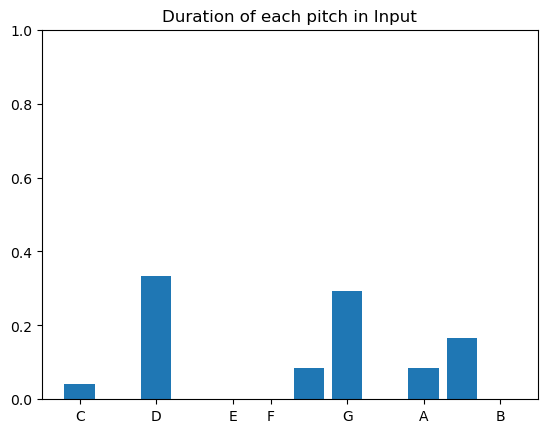

In [8]:
ratings_input = midi_input.get_pitch_class_histogram()

plt.bar(range(12), ratings_input)
plt.xticks([0, 2, 4, 5, 7, 9, 11])
plt.gca().set_xticklabels(["C", "D", "E", "F", "G", "A", "B"])
plt.ylim(0, 1)
plt.title("Duration of each pitch in Input")
plt.show()

#### Duration of each pitch in Ouptut

In [9]:
midi_output.get_pitch_class_histogram()

array([0.01282051, 0.        , 0.47435897, 0.        , 0.        ,
       0.        , 0.16666667, 0.02564103, 0.        , 0.25641026,
       0.06410256, 0.        ])

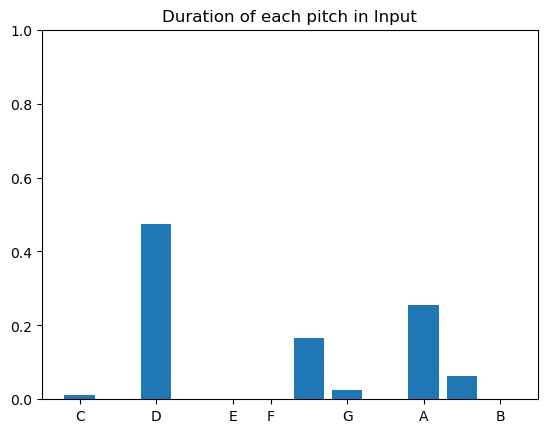

In [10]:
ratings_output = midi_output.get_pitch_class_histogram()

plt.bar(range(12), ratings_output)
plt.xticks([0, 2, 4, 5, 7, 9, 11])
plt.gca().set_xticklabels(["C", "D", "E", "F", "G", "A", "B"])
plt.ylim(0, 1)
plt.title("Duration of each pitch in Input")
plt.show()

#### Tempo of Input and Output

In [11]:
midi_input.estimate_tempo()

218.18181818181816

In [12]:
midi_output.estimate_tempo()

224.6808510638298

#### Key of Input

In [13]:
pitch, score = estimateKey_major(list(ratings_input), with_score = True)
int_to_key = ["C", 'D-', "D", 'E-', "E", "F", 'G-', "G", 'A-', "A", 'B-', "B"]
print(pitch, int_to_key[pitch], score)

7 G 0.687047379223086


In [14]:
pitch, score = estimateKey_minor(list(ratings_input), with_score = True)
print(pitch, int_to_key[pitch], score)

7 G 0.8357102097854934


In [15]:
pitch, gamme = estimateKey(list(ratings_input))
print(int_to_key[pitch], gamme)

G -1


#### Key of Output

In [16]:
pitch, score = estimateKey_major(list(ratings_output), with_score = True)
int_to_key = ["C", 'D-', "D", 'E-', "E", "F", 'G-', "G", 'A-', "A", 'B-', "B"]
print(pitch, int_to_key[pitch], score)

2 D 0.8757836227297496


In [17]:
pitch, score = estimateKey_minor(list(ratings_output), with_score = True)
print(pitch, int_to_key[pitch], score)

2 D 0.6800347960784932


In [18]:
pitch, gamme = estimateKey(list(ratings_output))
print(int_to_key[pitch], gamme)

D -1


## Tests on several outputs

For this test, you have to give the path to a folder with all your generations in the following form :
For a generation i :
- Input files : inputi.mid (id i==1, input1.mid)
- Output files : outputi.mid (if i==1, output1.mid)

In [14]:
path_to_folder = 'TEST'

In [15]:
nbr_input = 0
for elem in os.listdir(path_to_folder):
    if os.path.isfile(path_to_folder+'/'+elem):
        nbr_input+=1
nbr_input = int(nbr_input/2)
print(nbr_input)

20


#### Test sur la tonalité

In [16]:
nb_tot = 0
nb_same_tonality = 0

for i in range(1,nbr_input+1):
    if os.path.exists(path_to_folder+'/input'+str(i)+'.mid') and os.path.exists(path_to_folder+'/output'+str(i)+'.mid'):
        nb_tot += 1
        #Generates MIDI from files
        midi_input = pretty_midi.PrettyMIDI(path_to_folder+'/input'+str(i)+'.mid')
        midi_output = pretty_midi.PrettyMIDI(path_to_folder+'/output'+str(i)+'.mid')
        
        ratings_input = midi_input.get_pitch_class_histogram()
        ratings_output = midi_output.get_pitch_class_histogram()
        
        pitch_input, gamme_input = estimateKey(list(ratings_input))
        pitch_output, gamme_output = estimateKey(list(ratings_output))
        
        if (pitch_input == pitch_output) and (gamme_input == gamme_output):
            nb_same_tonality +=1
            
print(f"Le pourcentage de générations ayant eu même la tonalité que l'input est {round(100*nb_same_tonality/nb_tot,2)}%")     

Le pourcentage de générations ayant eu même la tonalité que l'input est 30.0%


#### Test sur la tempo

/home/mcoutier/miniconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


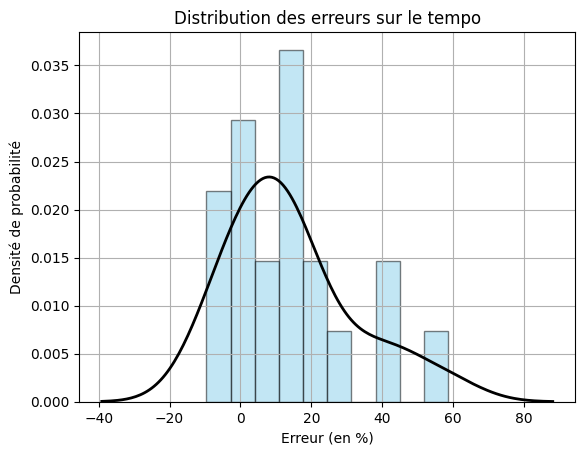

In [17]:
taux_erreur = []

for i in range(1,nbr_input+1):
    if os.path.exists(path_to_folder+'/input'+str(i)+'.mid') and os.path.exists(path_to_folder+'/output'+str(i)+'.mid'):
        #Generates MIDI from files
        midi_input = pretty_midi.PrettyMIDI(path_to_folder+'/input'+str(i)+'.mid')
        midi_output = pretty_midi.PrettyMIDI(path_to_folder+'/output'+str(i)+'.mid')
        
        predicted_tempo_input = midi_input.estimate_tempo()
        predicted_tempo_output = midi_output.estimate_tempo()
        
        erreur = 100*(predicted_tempo_output - predicted_tempo_input)/predicted_tempo_output
        
        taux_erreur.append(erreur)
            
plt.hist(taux_erreur, bins=10, density=True, alpha=0.5, color='skyblue', edgecolor='black')  # Histogramme
sns.kdeplot(taux_erreur, color='black', linestyle='-', linewidth=2)  # Courbe de densité de probabilité
plt.title('Distribution des erreurs sur le tempo')
plt.xlabel('Erreur (en %)')
plt.ylabel('Densité de probabilité')
plt.grid(True)
plt.show()